In [2]:
import numpy as np  
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("iris.csv")

In [6]:
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,outputs
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data["outputs"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
data.isnull().values.any()

False

In [9]:
data.value_counts()

sepal length in cm  sepal width in cm  petal length in cm  petal width in cm  outputs        
5.8                 2.7                5.1                 1.9                Iris-virginica     2
6.2                 2.2                4.5                 1.5                Iris-versicolor    1
                    2.9                4.3                 1.3                Iris-versicolor    1
                    3.4                5.4                 2.3                Iris-virginica     1
6.3                 2.3                4.4                 1.3                Iris-versicolor    1
                                                                                                ..
5.4                 3.9                1.3                 0.4                Iris-setosa        1
                                       1.7                 0.4                Iris-setosa        1
5.5                 2.3                4.0                 1.3                Iris-versicolor    1
               

In [10]:
data["outputs"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: outputs, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


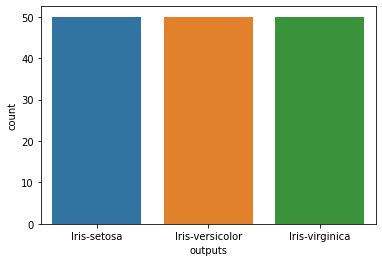

In [11]:
sns.countplot(data["outputs"])

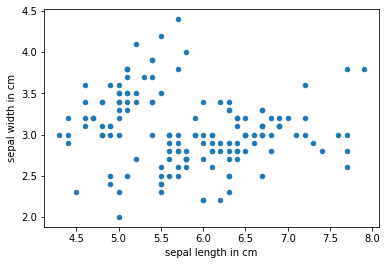

In [13]:
data.plot(kind = 'scatter', x = 'sepal length in cm', y = 'sepal width in cm')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


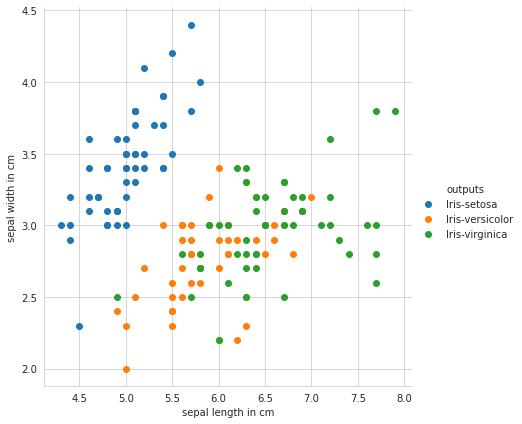

In [14]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='outputs', size=6).map(plt.scatter, 'sepal length in cm', 'sepal width in cm').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


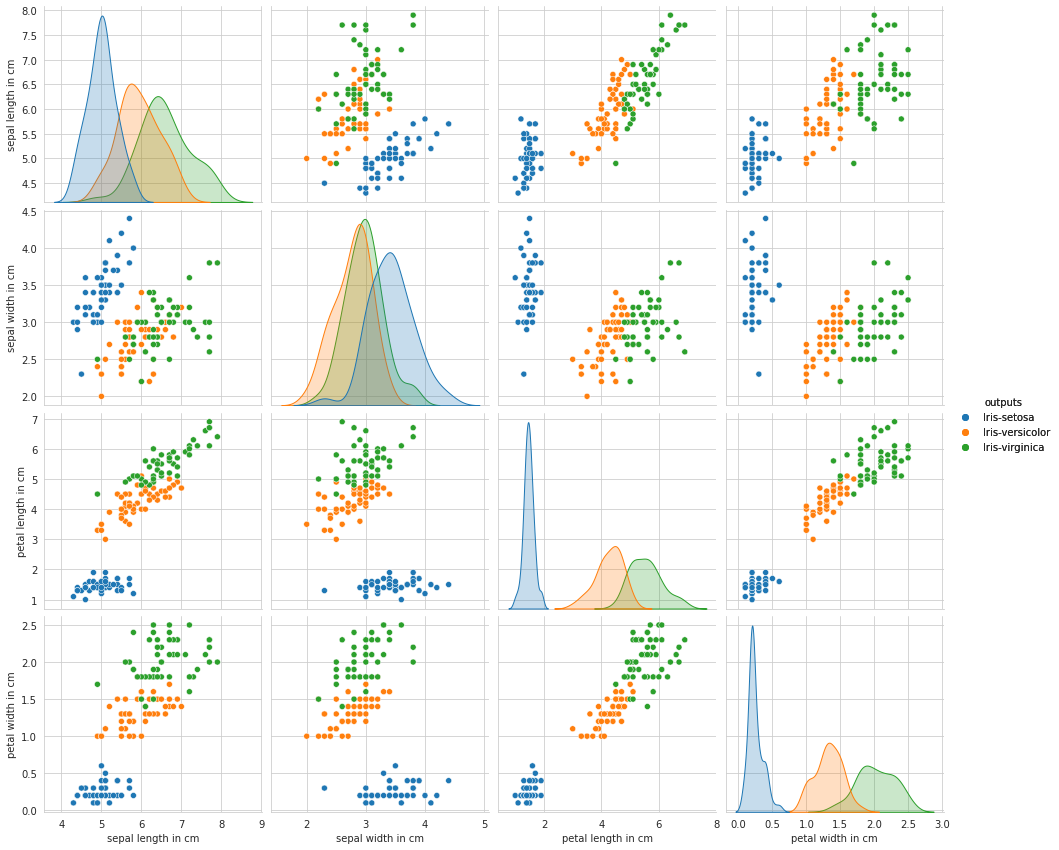

In [16]:
sns.pairplot(data, hue='outputs', size=3).add_legend()

In [17]:
for column in data.columns:
  if data[column].dtype==np.number:
    continue
    data[column] = LabelEncoder.fit_transform(data[column])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [19]:
data.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
outputs                object
dtype: object

In [20]:
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,outputs
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
x = data.drop(['outputs'],axis = 1)
y = data['outputs']

In [22]:
x

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: outputs, Length: 150, dtype: object

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
k_range=list(range(1,10))
acc=[]
for i in k_range:
  knn = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  acc.append(metrics.accuracy_score(y_test, y_pred))

In [26]:
acc

[1.0,
 0.9333333333333333,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

In [27]:
knn = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [29]:
metrics.accuracy_score(y_test, y_pred)

1.0